# DNA Methylation P Values

In [1]:
import pandas as pd
from scipy.stats import ttest_ind_from_stats
import math
from IPython.display import display, HTML

In [2]:
#https://www.graphpad.com/quickcalcs/ttest2/

In [3]:
data_path = "data/heat_map_from/"
result_path = "result/heat_map_from/"

In [4]:
df = pd.read_csv(data_path + "GAPDH.csv")

In [5]:
columns1 = ['one','Average1','SD1']
columns2 = ['two','Average2','SD2']
columns3 = ['three','Average3','SD3']
columns4 = ['four','Average4','SD4']

In [6]:
df.head(10)

,one,Average1,SD1,two,Average2,SD2,three,Average3,SD3,four,Average4,SD4
0,Normalized to GAPDH,CYP1A1-T0,SD,Normalized to GAPDH,CYP1A1-T1,SD,Normalized to GAPDH,CYP1A1-PT2,SD,Normalized to GAPDH,CYP1A1-PT7,SD
1,air,1.07,0.45,air,1.02,0.29,air,1.08,0.46,air,1.04,0.32
2,4l/min,1330.74,188.79,4l/min,71.04,6.04,4l/min,2.44,1.26,4l/min,0.9,0.16
3,1l/min,8759.31,378.43,1l/min,758,138.13,1l/min,302.14,39.75,1l/min,2.2,1.1
4,0.5l/min,6940.4,457.14,0.5l/min,3969.23,528.01,0.5l/min,1543.41,369.64,0.5l/min,6.1,2.03
5,Normalized to GAPDH,ALU-RT-T0,SD,Normalized to GAPDH,ALU-RT-T1,SD,Normalized to GAPDH,ALU-RT-PT2,SD,Normalized to GAPDH,ALU-RT-PT7,SD
6,air,1,0.05,air,1,0.06,air,1.01,0.16,air,1,0.1
7,4l/min,1.08,0.17,4l/min,0.83,0.17,4l/min,0.66,0.1,4l/min,0.92,0.35
8,1l/min,0.81,0.1,1l/min,0.59,0.14,1l/min,0.85,0.37,1l/min,0.91,0.2
9,0.5l/min,0.66,0.01,0.5l/min,0.44,0.05,0.5l/min,0.57,0.11,0.5l/min,0.94,0.08


In [7]:
def get_p_values(Experiment,cnames):
    n = 3
    p_values=['p-values','NA']
    for i in range(2,5):
        m1 = float(Experiment[cnames[1]][1])
        std1 = float(Experiment[cnames[2]][1])
        m2 = float(Experiment[cnames[1]][i])
        std2 = float(Experiment[cnames[2]][i])
        print("Air : ", "Mean : ", m1 , "SD : " , std1, "N : ", n )
        print(Experiment[cnames[0]][i], "Mean : ", m2 , "SD : " , std2, "N : ", n  )
        tstat, pvalue = ttest_ind_from_stats(m1, std1, n, m2, std2, n)
        print("P-Value : ", pvalue)
        p_values.append(round(pvalue,4))
        print('*'*20)
    Experiment['p_vales']= p_values
    return Experiment.copy()


def get_experiment(data,cnames,result_path,filename):
    HeatMapPvalues = {}
    for i in range(0, len(data), 5):
        Experiment = data.loc[i:i+4,cnames].copy().reset_index(drop = True)
        print("Data : ")
        display(Experiment)
        print("*"*20)
        Result = get_p_values(Experiment,cnames)
        #display(Result)
        geneName = Result[cnames[1]].iloc[0].split('-')[0]
        geneValues = Result[cnames[1]][2:5]
        HeatMapPvalues[geneName] = geneValues
    return HeatMapPvalues

In [8]:
H1 = get_experiment(df,columns1,result_path,"df-part-1")
H2 = get_experiment(df,columns2,result_path,"df-part-2")
H3 = get_experiment(df,columns3,result_path,"df-part-3")
H4 = get_experiment(df,columns4,result_path,"df-part-4")

Data : 


,one,Average1,SD1
0,Normalized to GAPDH,CYP1A1-T0,SD
1,air,1.07,0.45
2,4l/min,1330.74,188.79
3,1l/min,8759.31,378.43
4,0.5l/min,6940.4,457.14


********************
Air :  Mean :  1.07 SD :  0.45 N :  3
4l/min Mean :  1330.74 SD :  188.79 N :  3
P-Value :  0.000259205853401
********************
Air :  Mean :  1.07 SD :  0.45 N :  3
1l/min Mean :  8759.31 SD :  378.43 N :  3
P-Value :  2.31411621116e-06
********************
Air :  Mean :  1.07 SD :  0.45 N :  3
0.5l/min Mean :  6940.4 SD :  457.14 N :  3
P-Value :  1.2435395574e-05
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,ALU-RT-T0,SD
1,air,1,0.05
2,4l/min,1.08,0.17
3,1l/min,0.81,0.1
4,0.5l/min,0.66,0.01


********************
Air :  Mean :  1.0 SD :  0.05 N :  3
4l/min Mean :  1.08 SD :  0.17 N :  3
P-Value :  0.477934348118
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
1l/min Mean :  0.81 SD :  0.1 N :  3
P-Value :  0.0422430305045
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
0.5l/min Mean :  0.66 SD :  0.01 N :  3
P-Value :  0.000321025341833
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,HS 5 UTR-T0,SD
1,air,1,0.05
2,4l/min,0.9,0.11
3,1l/min,0.79,0.1
4,0.5l/min,0.5,0.05


********************
Air :  Mean :  1.0 SD :  0.05 N :  3
4l/min Mean :  0.9 SD :  0.11 N :  3
P-Value :  0.225021683066
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
1l/min Mean :  0.79 SD :  0.1 N :  3
P-Value :  0.0312778697714
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
0.5l/min Mean :  0.5 SD :  0.05 N :  3
P-Value :  0.000255216749442
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,HS 3 UTR-T0,SD
1,air,1,0.06
2,4l/min,0.96,0.16
3,1l/min,0.78,0.08
4,0.5l/min,0.55,0.12


********************
Air :  Mean :  1.0 SD :  0.06 N :  3
4l/min Mean :  0.96 SD :  0.16 N :  3
P-Value :  0.70590153256
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
1l/min Mean :  0.78 SD :  0.08 N :  3
P-Value :  0.0189318175513
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
0.5l/min Mean :  0.55 SD :  0.12 N :  3
P-Value :  0.0043685935956
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,ORF1-T0,SD
1,air,1.01,0.11
2,4l/min,1.05,0.15
3,1l/min,0.88,0.12
4,0.5l/min,0.58,0.07


********************
Air :  Mean :  1.01 SD :  0.11 N :  3
4l/min Mean :  1.05 SD :  0.15 N :  3
P-Value :  0.728443248902
********************
Air :  Mean :  1.01 SD :  0.11 N :  3
1l/min Mean :  0.88 SD :  0.12 N :  3
P-Value :  0.238799761955
********************
Air :  Mean :  1.01 SD :  0.11 N :  3
0.5l/min Mean :  0.58 SD :  0.07 N :  3
P-Value :  0.00464546239593
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,ORF2-T0,SD
1,air,1,0.04
2,4l/min,1.05,0.18
3,1l/min,0.85,0.11
4,0.5l/min,0.58,0.09


********************
Air :  Mean :  1.0 SD :  0.04 N :  3
4l/min Mean :  1.05 SD :  0.18 N :  3
P-Value :  0.663051791374
********************
Air :  Mean :  1.0 SD :  0.04 N :  3
1l/min Mean :  0.85 SD :  0.11 N :  3
P-Value :  0.0906438648365
********************
Air :  Mean :  1.0 SD :  0.04 N :  3
0.5l/min Mean :  0.58 SD :  0.09 N :  3
P-Value :  0.0017912869239
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,DNMT1-T0,SD
1,air,1,0.06
2,4l/min,0.87,0.1
3,1l/min,0.83,0.05
4,0.5l/min,0.6,0.02


********************
Air :  Mean :  1.0 SD :  0.06 N :  3
4l/min Mean :  0.87 SD :  0.1 N :  3
P-Value :  0.125701466733
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
1l/min Mean :  0.83 SD :  0.05 N :  3
P-Value :  0.0196039858832
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
0.5l/min Mean :  0.6 SD :  0.02 N :  3
P-Value :  0.000394492232523
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,DNMT3A-T0,SD
1,air,1,0.08
2,4l/min,0.93,0.08
3,1l/min,0.86,0.01
4,0.5l/min,0.55,0.15


********************
Air :  Mean :  1.0 SD :  0.08 N :  3
4l/min Mean :  0.93 SD :  0.08 N :  3
P-Value :  0.344229856922
********************
Air :  Mean :  1.0 SD :  0.08 N :  3
1l/min Mean :  0.86 SD :  0.01 N :  3
P-Value :  0.0396407153609
********************
Air :  Mean :  1.0 SD :  0.08 N :  3
0.5l/min Mean :  0.55 SD :  0.15 N :  3
P-Value :  0.0101462751981
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,DNMT3B-T0,SD
1,air,1,0.06
2,4l/min,0.98,0.15
3,1l/min,0.77,0.04
4,0.5l/min,0.45,0.04


********************
Air :  Mean :  1.0 SD :  0.06 N :  3
4l/min Mean :  0.98 SD :  0.15 N :  3
P-Value :  0.840705146587
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
1l/min Mean :  0.77 SD :  0.04 N :  3
P-Value :  0.00524358447147
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
0.5l/min Mean :  0.45 SD :  0.04 N :  3
P-Value :  0.00018969420216
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,TET1-T0,SD
1,air,1,0.06
2,4l/min,1.28,0.29
3,1l/min,0.65,0.23
4,0.5l/min,0.18,0.08


********************
Air :  Mean :  1.0 SD :  0.06 N :  3
4l/min Mean :  1.28 SD :  0.29 N :  3
P-Value :  0.176838391459
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
1l/min Mean :  0.65 SD :  0.23 N :  3
P-Value :  0.0632800863486
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
0.5l/min Mean :  0.18 SD :  0.08 N :  3
P-Value :  0.000142703596566
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,TET2-T0,SD
1,air,1,0.09
2,4l/min,0.87,0.11
3,1l/min,0.8,0.03
4,0.5l/min,0.55,0.03


********************
Air :  Mean :  1.0 SD :  0.09 N :  3
4l/min Mean :  0.87 SD :  0.11 N :  3
P-Value :  0.18830807193
********************
Air :  Mean :  1.0 SD :  0.09 N :  3
1l/min Mean :  0.8 SD :  0.03 N :  3
P-Value :  0.0217429784652
********************
Air :  Mean :  1.0 SD :  0.09 N :  3
0.5l/min Mean :  0.55 SD :  0.03 N :  3
P-Value :  0.00119625330979
********************
Data : 


,one,Average1,SD1
0,Normalized to GAPDH,TET3-T0,SD
1,air,1,0.06
2,4l/min,0.82,0.06
3,1l/min,0.8,0.03
4,0.5l/min,0.7,0.04


********************
Air :  Mean :  1.0 SD :  0.06 N :  3
4l/min Mean :  0.82 SD :  0.06 N :  3
P-Value :  0.0213116411288
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
1l/min Mean :  0.8 SD :  0.03 N :  3
P-Value :  0.00667966078749
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
0.5l/min Mean :  0.7 SD :  0.04 N :  3
P-Value :  0.00196620754056
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,CYP1A1-T1,SD
1,air,1.02,0.29
2,4l/min,71.04,6.04
3,1l/min,758,138.13
4,0.5l/min,3969.23,528.01


********************
Air :  Mean :  1.02 SD :  0.29 N :  3
4l/min Mean :  71.04 SD :  6.04 N :  3
P-Value :  3.64757597238e-05
********************
Air :  Mean :  1.02 SD :  0.29 N :  3
1l/min Mean :  758.0 SD :  138.13 N :  3
P-Value :  0.000687473880065
********************
Air :  Mean :  1.02 SD :  0.29 N :  3
0.5l/min Mean :  3969.23 SD :  528.01 N :  3
P-Value :  0.000201002893101
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,ALU-RT-T1,SD
1,air,1,0.06
2,4l/min,0.83,0.17
3,1l/min,0.59,0.14
4,0.5l/min,0.44,0.05


********************
Air :  Mean :  1.0 SD :  0.06 N :  3
4l/min Mean :  0.83 SD :  0.17 N :  3
P-Value :  0.177742149222
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
1l/min Mean :  0.59 SD :  0.14 N :  3
P-Value :  0.00957309710239
********************
Air :  Mean :  1.0 SD :  0.06 N :  3
0.5l/min Mean :  0.44 SD :  0.05 N :  3
P-Value :  0.000241698004409
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,HS 5 UTR-T1,SD
1,air,1,0.08
2,4l/min,0.86,0.16
3,1l/min,0.61,0.17
4,0.5l/min,0.41,0.03


********************
Air :  Mean :  1.0 SD :  0.08 N :  3
4l/min Mean :  0.86 SD :  0.16 N :  3
P-Value :  0.246729625449
********************
Air :  Mean :  1.0 SD :  0.08 N :  3
1l/min Mean :  0.61 SD :  0.17 N :  3
P-Value :  0.022853137921
********************
Air :  Mean :  1.0 SD :  0.08 N :  3
0.5l/min Mean :  0.41 SD :  0.03 N :  3
P-Value :  0.000280010068397
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,HS 3 UTR-T1,SD
1,air,1,0.02
2,4l/min,0.83,0.15
3,1l/min,0.56,0.15
4,0.5l/min,0.41,0.03


********************
Air :  Mean :  1.0 SD :  0.02 N :  3
4l/min Mean :  0.83 SD :  0.15 N :  3
P-Value :  0.123555559559
********************
Air :  Mean :  1.0 SD :  0.02 N :  3
1l/min Mean :  0.56 SD :  0.15 N :  3
P-Value :  0.00730199866836
********************
Air :  Mean :  1.0 SD :  0.02 N :  3
0.5l/min Mean :  0.41 SD :  0.03 N :  3
P-Value :  9.22129152158e-06
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,ORF1-T1,SD
1,air,1,0.04
2,4l/min,0.87,0.12
3,1l/min,0.61,0.16
4,0.5l/min,0.41,0.04


********************
Air :  Mean :  1.0 SD :  0.04 N :  3
4l/min Mean :  0.87 SD :  0.12 N :  3
P-Value :  0.149667131159
********************
Air :  Mean :  1.0 SD :  0.04 N :  3
1l/min Mean :  0.61 SD :  0.16 N :  3
P-Value :  0.014903935267
********************
Air :  Mean :  1.0 SD :  0.04 N :  3
0.5l/min Mean :  0.41 SD :  0.04 N :  3
P-Value :  5.52052550165e-05
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,ORF2-T1,SD
1,air,1,0.05
2,4l/min,0.85,0.2
3,1l/min,0.61,0.16
4,0.5l/min,0.42,0.05


********************
Air :  Mean :  1.0 SD :  0.05 N :  3
4l/min Mean :  0.85 SD :  0.2 N :  3
P-Value :  0.276087318865
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
1l/min Mean :  0.61 SD :  0.16 N :  3
P-Value :  0.0157375505457
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
0.5l/min Mean :  0.42 SD :  0.05 N :  3
P-Value :  0.00014253671222
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,DNMT1-T1,SD
1,air,1.01,0.08
2,4l/min,0.96,0.09
3,1l/min,0.72,0.06
4,0.5l/min,0.65,0.02


********************
Air :  Mean :  1.01 SD :  0.08 N :  3
4l/min Mean :  0.96 SD :  0.09 N :  3
P-Value :  0.511796947846
********************
Air :  Mean :  1.01 SD :  0.08 N :  3
1l/min Mean :  0.72 SD :  0.06 N :  3
P-Value :  0.00737002326009
********************
Air :  Mean :  1.01 SD :  0.08 N :  3
0.5l/min Mean :  0.65 SD :  0.02 N :  3
P-Value :  0.00163946550983
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,DNMT3A-T1,SD
1,air,1,0.01
2,4l/min,0.99,0.14
3,1l/min,0.72,0.1
4,0.5l/min,0.64,0.02


********************
Air :  Mean :  1.0 SD :  0.01 N :  3
4l/min Mean :  0.99 SD :  0.14 N :  3
P-Value :  0.907739829586
********************
Air :  Mean :  1.0 SD :  0.01 N :  3
1l/min Mean :  0.72 SD :  0.1 N :  3
P-Value :  0.0084879228596
********************
Air :  Mean :  1.0 SD :  0.01 N :  3
0.5l/min Mean :  0.64 SD :  0.02 N :  3
P-Value :  9.83840096175e-06
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,DNMT3B-T1,SD
1,air,1,0.08
2,4l/min,0.96,0.07
3,1l/min,0.65,0.07
4,0.5l/min,0.63,0.1


********************
Air :  Mean :  1.0 SD :  0.08 N :  3
4l/min Mean :  0.96 SD :  0.07 N :  3
P-Value :  0.550114254505
********************
Air :  Mean :  1.0 SD :  0.08 N :  3
1l/min Mean :  0.65 SD :  0.07 N :  3
P-Value :  0.00467334304366
********************
Air :  Mean :  1.0 SD :  0.08 N :  3
0.5l/min Mean :  0.63 SD :  0.1 N :  3
P-Value :  0.00746786620045
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,TET1-T1,SD
1,air,1,0.11
2,4l/min,0.71,0.04
3,1l/min,0.38,0.12
4,0.5l/min,0.25,0.03


********************
Air :  Mean :  1.0 SD :  0.11 N :  3
4l/min Mean :  0.71 SD :  0.04 N :  3
P-Value :  0.0127320861497
********************
Air :  Mean :  1.0 SD :  0.11 N :  3
1l/min Mean :  0.38 SD :  0.12 N :  3
P-Value :  0.0027356878691
********************
Air :  Mean :  1.0 SD :  0.11 N :  3
0.5l/min Mean :  0.25 SD :  0.03 N :  3
P-Value :  0.0003385078395
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,TET2-T1,SD
1,air,1,0.05
2,4l/min,0.92,0.2
3,1l/min,0.67,0.06
4,0.5l/min,0.6,0.04


********************
Air :  Mean :  1.0 SD :  0.05 N :  3
4l/min Mean :  0.92 SD :  0.2 N :  3
P-Value :  0.538324990596
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
1l/min Mean :  0.67 SD :  0.06 N :  3
P-Value :  0.00185480395207
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
0.5l/min Mean :  0.6 SD :  0.04 N :  3
P-Value :  0.000413906154956
********************
Data : 


,two,Average2,SD2
0,Normalized to GAPDH,TET3-T1,SD
1,air,1,0.03
2,4l/min,1.06,0.17
3,1l/min,0.73,0.12
4,0.5l/min,0.57,0.08


********************
Air :  Mean :  1.0 SD :  0.03 N :  3
4l/min Mean :  1.06 SD :  0.17 N :  3
P-Value :  0.579626643611
********************
Air :  Mean :  1.0 SD :  0.03 N :  3
1l/min Mean :  0.73 SD :  0.12 N :  3
P-Value :  0.0194231220814
********************
Air :  Mean :  1.0 SD :  0.03 N :  3
0.5l/min Mean :  0.57 SD :  0.08 N :  3
P-Value :  0.000953909144746
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,CYP1A1-PT2,SD
1,air,1.08,0.46
2,4l/min,2.44,1.26
3,1l/min,302.14,39.75
4,0.5l/min,1543.41,369.64


********************
Air :  Mean :  1.08 SD :  0.46 N :  3
4l/min Mean :  2.44 SD :  1.26 N :  3
P-Value :  0.153908246354
********************
Air :  Mean :  1.08 SD :  0.46 N :  3
1l/min Mean :  302.14 SD :  39.75 N :  3
P-Value :  0.000195038039063
********************
Air :  Mean :  1.08 SD :  0.46 N :  3
0.5l/min Mean :  1543.41 SD :  369.64 N :  3
P-Value :  0.0019445565233
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,ALU-RT-PT2,SD
1,air,1.01,0.16
2,4l/min,0.66,0.1
3,1l/min,0.85,0.37
4,0.5l/min,0.57,0.11


********************
Air :  Mean :  1.01 SD :  0.16 N :  3
4l/min Mean :  0.66 SD :  0.1 N :  3
P-Value :  0.0324976485909
********************
Air :  Mean :  1.01 SD :  0.16 N :  3
1l/min Mean :  0.85 SD :  0.37 N :  3
P-Value :  0.529573911435
********************
Air :  Mean :  1.01 SD :  0.16 N :  3
0.5l/min Mean :  0.57 SD :  0.11 N :  3
P-Value :  0.0171747775047
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,HS 5 UTR-PT2,SD
1,air,1.01,0.17
2,4l/min,0.87,0.09
3,1l/min,0.93,0.19
4,0.5l/min,0.75,0.19


********************
Air :  Mean :  1.01 SD :  0.17 N :  3
4l/min Mean :  0.87 SD :  0.09 N :  3
P-Value :  0.275964326013
********************
Air :  Mean :  1.01 SD :  0.17 N :  3
1l/min Mean :  0.93 SD :  0.19 N :  3
P-Value :  0.615662183529
********************
Air :  Mean :  1.01 SD :  0.17 N :  3
0.5l/min Mean :  0.75 SD :  0.19 N :  3
P-Value :  0.152085338382
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,HS 3 UTR-PT2,SD
1,air,1,0.14
2,4l/min,0.83,0.11
3,1l/min,0.87,0.23
4,0.5l/min,0.69,0.13


********************
Air :  Mean :  1.0 SD :  0.14 N :  3
4l/min Mean :  0.83 SD :  0.11 N :  3
P-Value :  0.17351364971
********************
Air :  Mean :  1.0 SD :  0.14 N :  3
1l/min Mean :  0.87 SD :  0.23 N :  3
P-Value :  0.450061806404
********************
Air :  Mean :  1.0 SD :  0.14 N :  3
0.5l/min Mean :  0.69 SD :  0.13 N :  3
P-Value :  0.048294806095
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,ORF1-PT2,SD
1,air,1.01,0.13
2,4l/min,0.98,0.05
3,1l/min,0.88,0.17
4,0.5l/min,0.73,0.2


********************
Air :  Mean :  1.01 SD :  0.13 N :  3
4l/min Mean :  0.98 SD :  0.05 N :  3
P-Value :  0.728030423097
********************
Air :  Mean :  1.01 SD :  0.13 N :  3
1l/min Mean :  0.88 SD :  0.17 N :  3
P-Value :  0.352097523664
********************
Air :  Mean :  1.01 SD :  0.13 N :  3
0.5l/min Mean :  0.73 SD :  0.2 N :  3
P-Value :  0.111815333431
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,ORF2-PT2,SD
1,air,1.01,0.18
2,4l/min,1.01,0.14
3,1l/min,0.92,0.19
4,0.5l/min,0.79,0.15


********************
Air :  Mean :  1.01 SD :  0.18 N :  3
4l/min Mean :  1.01 SD :  0.14 N :  3
P-Value :  1.0
********************
Air :  Mean :  1.01 SD :  0.18 N :  3
1l/min Mean :  0.92 SD :  0.19 N :  3
P-Value :  0.583502955546
********************
Air :  Mean :  1.01 SD :  0.18 N :  3
0.5l/min Mean :  0.79 SD :  0.15 N :  3
P-Value :  0.179216159372
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,DNMT1-PT2,SD
1,air,1,0.1
2,4l/min,0.94,0.23
3,1l/min,0.77,0.15
4,0.5l/min,0.74,0.03


********************
Air :  Mean :  1.0 SD :  0.1 N :  3
4l/min Mean :  0.94 SD :  0.23 N :  3
P-Value :  0.699861531097
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
1l/min Mean :  0.77 SD :  0.15 N :  3
P-Value :  0.0916497346967
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
0.5l/min Mean :  0.74 SD :  0.03 N :  3
P-Value :  0.0125123027673
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,DNMT3A-PT2,SD
1,air,1,0.07
2,4l/min,1.03,0.15
3,1l/min,0.95,0.06
4,0.5l/min,0.97,0.17


********************
Air :  Mean :  1.0 SD :  0.07 N :  3
4l/min Mean :  1.03 SD :  0.15 N :  3
P-Value :  0.769278164759
********************
Air :  Mean :  1.0 SD :  0.07 N :  3
1l/min Mean :  0.95 SD :  0.06 N :  3
P-Value :  0.400741293241
********************
Air :  Mean :  1.0 SD :  0.07 N :  3
0.5l/min Mean :  0.97 SD :  0.17 N :  3
P-Value :  0.791480195524
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,DNMT3B-PT2,SD
1,air,1,0.1
2,4l/min,0.93,0.07
3,1l/min,0.98,0.18
4,0.5l/min,0.94,0.15


********************
Air :  Mean :  1.0 SD :  0.1 N :  3
4l/min Mean :  0.93 SD :  0.07 N :  3
P-Value :  0.376801820144
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
1l/min Mean :  0.98 SD :  0.18 N :  3
P-Value :  0.874564728842
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
0.5l/min Mean :  0.94 SD :  0.15 N :  3
P-Value :  0.595188104418
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,TET1-PT2,SD
1,air,1.01,0.21
2,4l/min,0.91,0.18
3,1l/min,0.71,0.05
4,0.5l/min,0.49,0.09


********************
Air :  Mean :  1.01 SD :  0.21 N :  3
4l/min Mean :  0.91 SD :  0.18 N :  3
P-Value :  0.565128876514
********************
Air :  Mean :  1.01 SD :  0.21 N :  3
1l/min Mean :  0.71 SD :  0.05 N :  3
P-Value :  0.0737885350911
********************
Air :  Mean :  1.01 SD :  0.21 N :  3
0.5l/min Mean :  0.49 SD :  0.09 N :  3
P-Value :  0.0169297573549
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,TET2-PT2,SD
1,air,1.01,0.13
2,4l/min,1.01,0.18
3,1l/min,0.91,0.06
4,0.5l/min,0.87,0.11


********************
Air :  Mean :  1.01 SD :  0.13 N :  3
4l/min Mean :  1.01 SD :  0.18 N :  3
P-Value :  1.0
********************
Air :  Mean :  1.01 SD :  0.13 N :  3
1l/min Mean :  0.91 SD :  0.06 N :  3
P-Value :  0.292990866656
********************
Air :  Mean :  1.01 SD :  0.13 N :  3
0.5l/min Mean :  0.87 SD :  0.11 N :  3
P-Value :  0.22756935295
********************
Data : 


,three,Average3,SD3
0,Normalized to GAPDH,TET3-PT2,SD
1,air,1,0.14
2,4l/min,1.13,0.19
3,1l/min,0.93,0.06
4,0.5l/min,1,0.15


********************
Air :  Mean :  1.0 SD :  0.14 N :  3
4l/min Mean :  1.13 SD :  0.19 N :  3
P-Value :  0.394079153151
********************
Air :  Mean :  1.0 SD :  0.14 N :  3
1l/min Mean :  0.93 SD :  0.06 N :  3
P-Value :  0.470599202948
********************
Air :  Mean :  1.0 SD :  0.14 N :  3
0.5l/min Mean :  1.0 SD :  0.15 N :  3
P-Value :  1.0
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,CYP1A1-PT7,SD
1,air,1.04,0.32
2,4l/min,0.9,0.16
3,1l/min,2.2,1.1
4,0.5l/min,6.1,2.03


********************
Air :  Mean :  1.04 SD :  0.32 N :  3
4l/min Mean :  0.9 SD :  0.16 N :  3
P-Value :  0.535096105451
********************
Air :  Mean :  1.04 SD :  0.32 N :  3
1l/min Mean :  2.2 SD :  1.1 N :  3
P-Value :  0.154325853327
********************
Air :  Mean :  1.04 SD :  0.32 N :  3
0.5l/min Mean :  6.1 SD :  2.03 N :  3
P-Value :  0.0130051861855
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,ALU-RT-PT7,SD
1,air,1,0.1
2,4l/min,0.92,0.35
3,1l/min,0.91,0.2
4,0.5l/min,0.94,0.08


********************
Air :  Mean :  1.0 SD :  0.1 N :  3
4l/min Mean :  0.92 SD :  0.35 N :  3
P-Value :  0.72280466346
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
1l/min Mean :  0.91 SD :  0.2 N :  3
P-Value :  0.524110442534
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
0.5l/min Mean :  0.94 SD :  0.08 N :  3
P-Value :  0.462603939709
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,HS 5 UTR-PT7,SD
1,air,1,0.1
2,4l/min,1.04,0.31
3,1l/min,0.93,0.14
4,0.5l/min,1.09,0.07


********************
Air :  Mean :  1.0 SD :  0.1 N :  3
4l/min Mean :  1.04 SD :  0.31 N :  3
P-Value :  0.841962553349
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
1l/min Mean :  0.93 SD :  0.14 N :  3
P-Value :  0.519856705112
********************
Air :  Mean :  1.0 SD :  0.1 N :  3
0.5l/min Mean :  1.09 SD :  0.07 N :  3
P-Value :  0.270675739642
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,HS 3 UTR-PT7,SD
1,air,1.01,0.09
2,4l/min,1.06,0.42
3,1l/min,0.91,0.14
4,0.5l/min,1.09,0.09


********************
Air :  Mean :  1.01 SD :  0.09 N :  3
4l/min Mean :  1.06 SD :  0.42 N :  3
P-Value :  0.850052498809
********************
Air :  Mean :  1.01 SD :  0.09 N :  3
1l/min Mean :  0.91 SD :  0.14 N :  3
P-Value :  0.356785763579
********************
Air :  Mean :  1.01 SD :  0.09 N :  3
0.5l/min Mean :  1.09 SD :  0.09 N :  3
P-Value :  0.33750185654
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,ORF1-PT7,SD
1,air,1,0.05
2,4l/min,1.1,0.46
3,1l/min,0.91,0.12
4,0.5l/min,1,0.11


********************
Air :  Mean :  1.0 SD :  0.05 N :  3
4l/min Mean :  1.1 SD :  0.46 N :  3
P-Value :  0.727158998985
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
1l/min Mean :  0.91 SD :  0.12 N :  3
P-Value :  0.29666027481
********************
Air :  Mean :  1.0 SD :  0.05 N :  3
0.5l/min Mean :  1.0 SD :  0.11 N :  3
P-Value :  1.0
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,ORF2-PT7,SD
1,air,1.01,0.11
2,4l/min,1.07,0.42
3,1l/min,1,0.15
4,0.5l/min,1.19,0.17


********************
Air :  Mean :  1.01 SD :  0.11 N :  3
4l/min Mean :  1.07 SD :  0.42 N :  3
P-Value :  0.822589182333
********************
Air :  Mean :  1.01 SD :  0.11 N :  3
1l/min Mean :  1.0 SD :  0.15 N :  3
P-Value :  0.930289142478
********************
Air :  Mean :  1.01 SD :  0.11 N :  3
0.5l/min Mean :  1.19 SD :  0.17 N :  3
P-Value :  0.198468392885
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,DNMT1-PT7,SD
1,air,1.01,0.1
2,4l/min,0.95,0.18
3,1l/min,0.81,0.09
4,0.5l/min,1.06,0.16


********************
Air :  Mean :  1.01 SD :  0.1 N :  3
4l/min Mean :  0.95 SD :  0.18 N :  3
P-Value :  0.640308149913
********************
Air :  Mean :  1.01 SD :  0.1 N :  3
1l/min Mean :  0.81 SD :  0.09 N :  3
P-Value :  0.0616621227945
********************
Air :  Mean :  1.01 SD :  0.1 N :  3
0.5l/min Mean :  1.06 SD :  0.16 N :  3
P-Value :  0.670073708819
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,DNMT3A-PT7,SD
1,air,1,0.07
2,4l/min,1.05,0.24
3,1l/min,0.96,0.09
4,0.5l/min,1.34,0.1


********************
Air :  Mean :  1.0 SD :  0.07 N :  3
4l/min Mean :  1.05 SD :  0.24 N :  3
P-Value :  0.746489342805
********************
Air :  Mean :  1.0 SD :  0.07 N :  3
1l/min Mean :  0.96 SD :  0.09 N :  3
P-Value :  0.576231713926
********************
Air :  Mean :  1.0 SD :  0.07 N :  3
0.5l/min Mean :  1.34 SD :  0.1 N :  3
P-Value :  0.00849557507772
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,DNMT3B-PT7,SD
1,air,1,0.14
2,4l/min,1.01,0.22
3,1l/min,0.9,0.1
4,0.5l/min,1.06,0.07


********************
Air :  Mean :  1.0 SD :  0.14 N :  3
4l/min Mean :  1.01 SD :  0.22 N :  3
P-Value :  0.950229896341
********************
Air :  Mean :  1.0 SD :  0.14 N :  3
1l/min Mean :  0.9 SD :  0.1 N :  3
P-Value :  0.371019581532
********************
Air :  Mean :  1.0 SD :  0.14 N :  3
0.5l/min Mean :  1.06 SD :  0.07 N :  3
P-Value :  0.543042790594
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,TET1-PT7,SD
1,air,1,0.12
2,4l/min,0.97,0.23
3,1l/min,0.9,0.04
4,0.5l/min,1.14,0.19


********************
Air :  Mean :  1.0 SD :  0.12 N :  3
4l/min Mean :  0.97 SD :  0.23 N :  3
P-Value :  0.851019776788
********************
Air :  Mean :  1.0 SD :  0.12 N :  3
1l/min Mean :  0.9 SD :  0.04 N :  3
P-Value :  0.242749808073
********************
Air :  Mean :  1.0 SD :  0.12 N :  3
0.5l/min Mean :  1.14 SD :  0.19 N :  3
P-Value :  0.341287590851
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,TET2-PT7,SD
1,air,1.01,0.08
2,4l/min,1,0.26
3,1l/min,0.89,0.01
4,0.5l/min,1.34,0.1


********************
Air :  Mean :  1.01 SD :  0.08 N :  3
4l/min Mean :  1.0 SD :  0.26 N :  3
P-Value :  0.952286699052
********************
Air :  Mean :  1.01 SD :  0.08 N :  3
1l/min Mean :  0.89 SD :  0.01 N :  3
P-Value :  0.0614561910107
********************
Air :  Mean :  1.01 SD :  0.08 N :  3
0.5l/min Mean :  1.34 SD :  0.1 N :  3
P-Value :  0.0111322578357
********************
Data : 


,four,Average4,SD4
0,Normalized to GAPDH,TET3-PT7,SD
1,air,1,0.12
2,4l/min,1.04,0.16
3,1l/min,0.98,0.09
4,0.5l/min,1.31,0.08


********************
Air :  Mean :  1.0 SD :  0.12 N :  3
4l/min Mean :  1.04 SD :  0.16 N :  3
P-Value :  0.746489342805
********************
Air :  Mean :  1.0 SD :  0.12 N :  3
1l/min Mean :  0.98 SD :  0.09 N :  3
P-Value :  0.828692856616
********************
Air :  Mean :  1.0 SD :  0.12 N :  3
0.5l/min Mean :  1.31 SD :  0.08 N :  3
P-Value :  0.0204213997236
********************


In [9]:
dfH1 = pd.DataFrame(H1)
dfH2 = pd.DataFrame(H2)
dfH3 = pd.DataFrame(H3)
dfH4 = pd.DataFrame(H4)

In [10]:
dfH1

,ALU,CYP1A1,DNMT1,DNMT3A,DNMT3B,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
2,1.08,1330.74,0.87,0.93,0.98,0.96,0.9,1.05,1.05,1.28,0.87,0.82
3,0.81,8759.31,0.83,0.86,0.77,0.78,0.79,0.88,0.85,0.65,0.8,0.8
4,0.66,6940.4,0.6,0.55,0.45,0.55,0.5,0.58,0.58,0.18,0.55,0.7


In [11]:
dfH2

,ALU,CYP1A1,DNMT1,DNMT3A,DNMT3B,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
2,0.83,71.04,0.96,0.99,0.96,0.83,0.86,0.87,0.85,0.71,0.92,1.06
3,0.59,758,0.72,0.72,0.65,0.56,0.61,0.61,0.61,0.38,0.67,0.73
4,0.44,3969.23,0.65,0.64,0.63,0.41,0.41,0.41,0.42,0.25,0.6,0.57


In [12]:
dfH3

,ALU,CYP1A1,DNMT1,DNMT3A,DNMT3B,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
2,0.66,2.44,0.94,1.03,0.93,0.83,0.87,0.98,1.01,0.91,1.01,1.13
3,0.85,302.14,0.77,0.95,0.98,0.87,0.93,0.88,0.92,0.71,0.91,0.93
4,0.57,1543.41,0.74,0.97,0.94,0.69,0.75,0.73,0.79,0.49,0.87,1


In [13]:
dfH4

,ALU,CYP1A1,DNMT1,DNMT3A,DNMT3B,HS 3 UTR,HS 5 UTR,ORF1,ORF2,TET1,TET2,TET3
2,0.92,0.9,0.95,1.05,1.01,1.06,1.04,1.1,1.07,0.97,1,1.04
3,0.91,2.2,0.81,0.96,0.9,0.91,0.93,0.91,1,0.9,0.89,0.98
4,0.94,6.1,1.06,1.34,1.06,1.09,1.09,1,1.19,1.14,1.34,1.31


In [14]:
#dfH1 = dfH1.drop([0]).copy()
#dfH3 = dfH3.drop([0]).copy()
#dfH5 = dfH5.drop([0]).copy()
#dfH7 = dfH7.drop([0]).copy()

In [15]:
df1 = dfH1.transpose()
df2 = dfH2.transpose()
df3 = dfH3.transpose()
df4 = dfH4.transpose()

In [16]:
df1.columns = ['4L/min','1L/min','0.5L/min']
df2.columns = ['4L/min','1L/min','0.5L/min']
df3.columns = ['4L/min','1L/min','0.5L/min']
df4.columns = ['4L/min','1L/min','0.5L/min']

In [17]:
df1['4L/min'] = pd.to_numeric(df1['4L/min'])
df1['1L/min'] = pd.to_numeric(df1['1L/min'])
df1['0.5L/min'] = pd.to_numeric(df1['0.5L/min'])



df2['4L/min'] = pd.to_numeric(df2['4L/min'])
df2['1L/min'] = pd.to_numeric(df2['1L/min'])
df2['0.5L/min'] = pd.to_numeric(df2['0.5L/min'])



df3['4L/min'] = pd.to_numeric(df3['4L/min'])
df3['1L/min'] = pd.to_numeric(df3['1L/min'])
df3['0.5L/min'] = pd.to_numeric(df3['0.5L/min'])



df4['4L/min'] = pd.to_numeric(df4['4L/min'])
df4['1L/min'] = pd.to_numeric(df4['1L/min'])
df4['0.5L/min'] = pd.to_numeric(df4['0.5L/min'])

In [18]:
df1.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [19]:
df2.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [20]:
df3.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [21]:
df4.dtypes

4L/min      float64
1L/min      float64
0.5L/min    float64
dtype: object

In [22]:
df1 = df1.apply(lambda x: [y if y <=5 else 3 for y in x])
df2 = df2.apply(lambda x: [y if y <=5 else 3 for y in x])
df3 = df3.apply(lambda x: [y if y <=5 else 3 for y in x])
df4 = df4.apply(lambda x: [y if y <=5 else 3 for y in x])

In [23]:
df1

,4L/min,1L/min,0.5L/min
ALU,1.08,0.81,0.66
CYP1A1,3.00,3.00,3.00
DNMT1,0.87,0.83,0.60
DNMT3A,0.93,0.86,0.55
DNMT3B,0.98,0.77,0.45
HS 3 UTR,0.96,0.78,0.55
HS 5 UTR,0.90,0.79,0.50
ORF1,1.05,0.88,0.58
ORF2,1.05,0.85,0.58
TET1,1.28,0.65,0.18


In [24]:
df1 = df1.reindex(["CYP1A1", "ALU", "HS 5 UTR","HS 3 UTR","ORF1","ORF2","DNMT1","DNMT3A","DNMT3B","TET1","TET2","TET3"])

In [25]:
df1

,4L/min,1L/min,0.5L/min
CYP1A1,3.00,3.00,3.00
ALU,1.08,0.81,0.66
HS 5 UTR,0.90,0.79,0.50
HS 3 UTR,0.96,0.78,0.55
ORF1,1.05,0.88,0.58
ORF2,1.05,0.85,0.58
DNMT1,0.87,0.83,0.60
DNMT3A,0.93,0.86,0.55
DNMT3B,0.98,0.77,0.45
TET1,1.28,0.65,0.18


In [26]:
df2 = df2.reindex(["CYP1A1", "ALU", "HS 5 UTR","HS 3 UTR","ORF1","ORF2","DNMT1","DNMT3A","DNMT3B","TET1","TET2","TET3"])

In [27]:
df2

,4L/min,1L/min,0.5L/min
CYP1A1,3.00,3.00,3.00
ALU,0.83,0.59,0.44
HS 5 UTR,0.86,0.61,0.41
HS 3 UTR,0.83,0.56,0.41
ORF1,0.87,0.61,0.41
ORF2,0.85,0.61,0.42
DNMT1,0.96,0.72,0.65
DNMT3A,0.99,0.72,0.64
DNMT3B,0.96,0.65,0.63
TET1,0.71,0.38,0.25


In [28]:
df3 = df3.reindex(["CYP1A1", "ALU", "HS 5 UTR","HS 3 UTR","ORF1","ORF2","DNMT1","DNMT3A","DNMT3B","TET1","TET2","TET3"])

In [29]:
df3

,4L/min,1L/min,0.5L/min
CYP1A1,2.44,3.00,3.00
ALU,0.66,0.85,0.57
HS 5 UTR,0.87,0.93,0.75
HS 3 UTR,0.83,0.87,0.69
ORF1,0.98,0.88,0.73
ORF2,1.01,0.92,0.79
DNMT1,0.94,0.77,0.74
DNMT3A,1.03,0.95,0.97
DNMT3B,0.93,0.98,0.94
TET1,0.91,0.71,0.49


In [30]:
df4 = df4.reindex(["CYP1A1", "ALU", "HS 5 UTR","HS 3 UTR","ORF1","ORF2","DNMT1","DNMT3A","DNMT3B","TET1","TET2","TET3"])

In [31]:
df4

,4L/min,1L/min,0.5L/min
CYP1A1,0.90,2.20,3.00
ALU,0.92,0.91,0.94
HS 5 UTR,1.04,0.93,1.09
HS 3 UTR,1.06,0.91,1.09
ORF1,1.10,0.91,1.00
ORF2,1.07,1.00,1.19
DNMT1,0.95,0.81,1.06
DNMT3A,1.05,0.96,1.34
DNMT3B,1.01,0.90,1.06
TET1,0.97,0.90,1.14


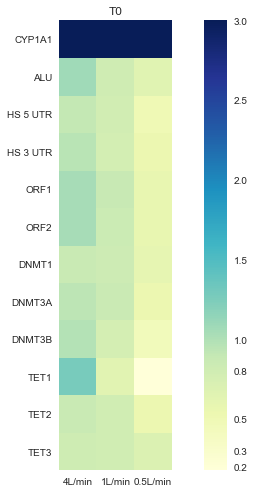

In [32]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df1,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("T0")
plt.yticks(rotation=0)
fig.savefig(result_path + "GAPDH/T0.png")

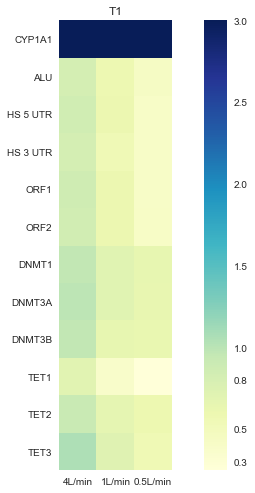

In [33]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df2,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("T1")
plt.yticks(rotation=0)
fig.savefig(result_path + "GAPDH/T1.png")

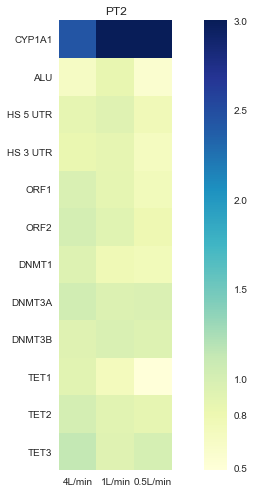

In [34]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df3,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("PT2")
plt.yticks(rotation=0)
fig.savefig(result_path + "GAPDH/PT2.png")

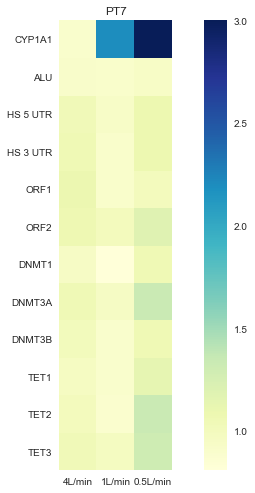

In [35]:
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
pal = sns.dark_palette("navy", as_cmap=True)
sns.heatmap(df4,cmap="YlGnBu",square=True,cbar_kws=dict(ticks=[0.0,0.2,0.3,0.5,0.8, 1.0,1.5,2.0,2.5,3,3.5,4.0,4.5,5])).set_title("PT7")
plt.yticks(rotation=0)
fig.savefig(result_path + "GAPDH/PT7.png")